<a href="https://colab.research.google.com/github/tarini-py/Data-Science-Machine-Learning-DSML/blob/main/CLT_and_CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv


--2025-09-08 16:02:06--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 192.178.163.101, 192.178.163.113, 192.178.163.102, ...
Connecting to drive.google.com (drive.google.com)|192.178.163.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2025-09-08 16:02:06--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.004s  

2025-09-08 16:02:07 (10

In [ ]:
df_hw=pd.read_csv('weight-height.csv')

In [ ]:
df_height=df_hw['Height']

<Axes: xlabel='Height', ylabel='Count'>

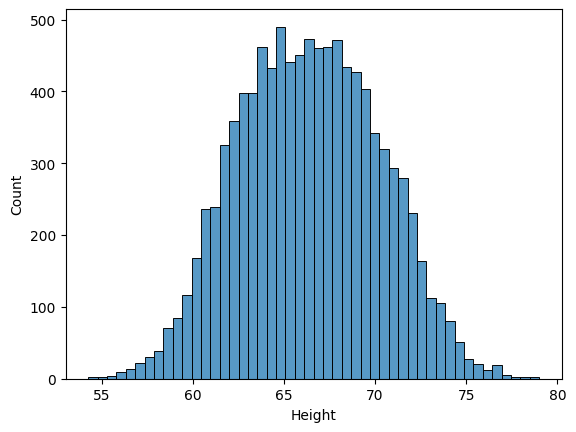

In [ ]:
sns.histplot(df_height)

In [ ]:
mu=df_height.mean()

In [ ]:
mu

np.float64(66.36755975482124)

In [ ]:
sigma=df_height.std()

In [ ]:
sigma

3.8475281207732324

<Axes: ylabel='Count'>

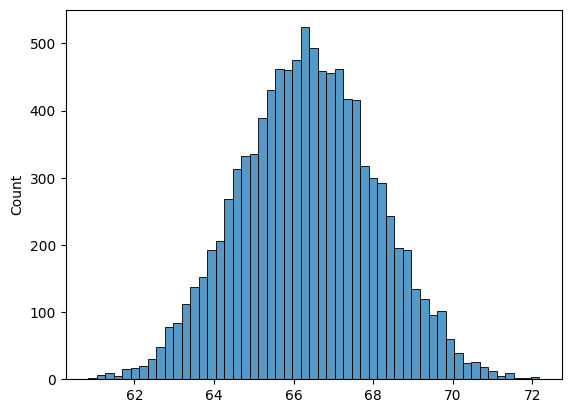

In [ ]:
sample_5=[np.mean(df_height.sample(5)) for i in range(10000)]
sns.histplot(sample_5)

In [ ]:
np.mean(sample_5)

np.float64(66.36073133224346)

<Axes: ylabel='Count'>

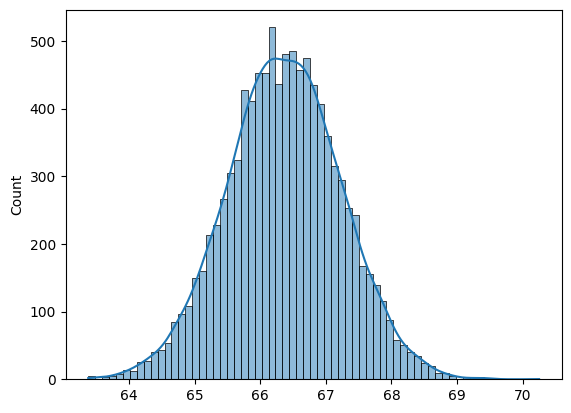

In [ ]:
sample_20 = [np.mean(df_height.sample(20)) for i in range(10000) ]

sns.histplot(sample_20, kde=True)

In [ ]:
np.mean(sample_20)

np.float64(66.36553234795558)

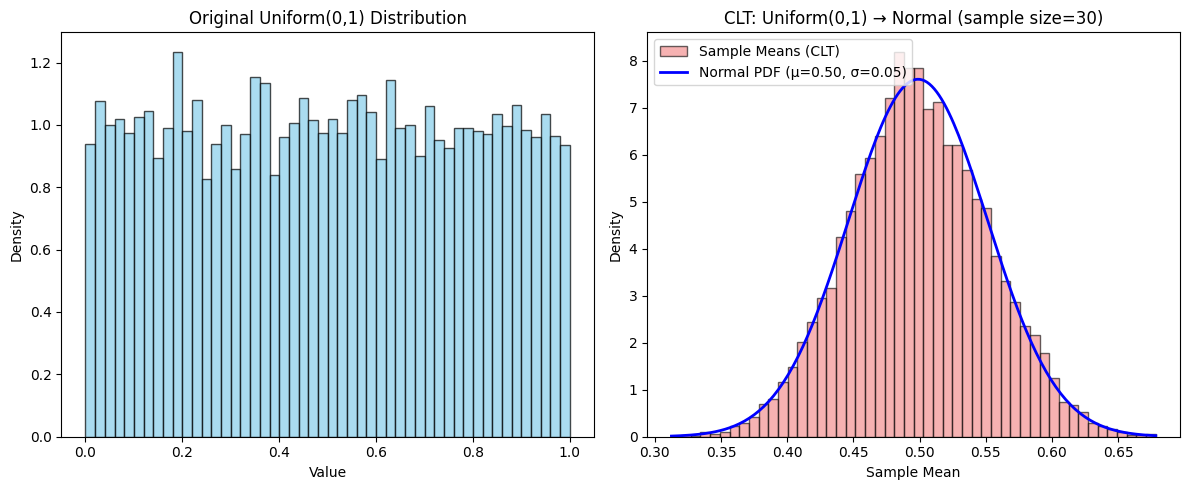

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n_samples = 10000    # number of total samples
sample_size = 30     # sample size for CLT

# Step 1: Generate Uniform(0,1) samples
uniform_data = np.random.uniform(0, 1, n_samples)

# Step 2: Plot the Uniform distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(uniform_data, bins=50, density=True, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Original Uniform(0,1) Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

# Step 3: Apply CLT - take repeated samples and compute their means
uniform_samples = np.random.uniform(0, 1, (n_samples, sample_size))
sample_means = uniform_samples.mean(axis=1)

# Step 4: Theoretical normal distribution parameters
mu = np.mean(sample_means)       # should be close to 0.5
sigma = np.std(sample_means)     # should be close to sqrt(1/12n)

x = np.linspace(min(sample_means), max(sample_means), 200)
pdf = norm.pdf(x, mu, sigma)

# Step 5: Plot the "converted" normal distribution
plt.subplot(1,2,2)
plt.hist(sample_means, bins=50, density=True, color="lightcoral", edgecolor="black", alpha=0.6, label="Sample Means (CLT)")
plt.plot(x, pdf, 'b-', lw=2, label=f"Normal PDF (μ={mu:.2f}, σ={sigma:.2f})")
plt.title(f"CLT: Uniform(0,1) → Normal (sample size={sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


# Systolic blood pressure of a group of people is known to have an average of 122 mmHg
and a standard deviation of 10 mmHg.
Calculate the probability that the average blood pressure of 16 people will be greater than 125 mmHg.  



Systolic blood pressure of a group of people is known to have an average of 122 mmHg
and a standard deviation of 10 mmHg.
Calculate the probability that the average blood pressure of 16 people will be greater than 125 mmHg.  



In [ ]:
u=122
x=125
sigma=10/np.sqrt(16)
sigma

np.float64(2.5)

In [ ]:
# P(X>125) = 1-P(X<125)

z=(125-122)/2.5

In [ ]:
z

1.2

In [ ]:
norm.cdf(z)

np.float64(0.8849303297782918)

In [ ]:
1-norm.cdf(z)

np.float64(0.11506967022170822)

In [ ]:
z2=norm.ppf(1-0.025)

In [ ]:
z2

np.float64(1.959963984540054)

In [ ]:
u=45
sigma=10
n=80

se=10/np.sqrt(80)

In [ ]:
se

np.float64(1.118033988749895)

In [ ]:
# 90% confidence interval is given

z1=norm.ppf(0.05)
x1=45+z1*se

In [ ]:
x1

np.float64(43.16099773854971)

In [ ]:
z2=norm.ppf(1-0.05)
x2=45+z2*se
x2

np.float64(46.83900226145029)

In [ ]:
norm.interval(0.90,loc=45,scale=se)

(np.float64(43.16099773854971), np.float64(46.83900226145029))

The mean height of a sample of 100 adults was found to be 65 inches,
with a standard deviation of 2.5 inches.
Compute 95% confidence interval

In [ ]:
norm.interval(0.95,loc=65,scale=2.5/np.sqrt(100))

(np.float64(64.51000900386498), np.float64(65.48999099613502))